Install qiskit
and also matplotlib and pylatexenc (for nicer circuit plots)

In [286]:
!pip install qiskit 
!pip install qiskit_aer
!pip install qiskit_ibm_provider
!pip install qiskit_ibm_runtime
!pip install qiskit_ibmq_provider 
!pip install matplotlib  
!pip install pylatexenc 

### Import Qiskit

In [287]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
import matplotlib.pyplot as plt


## Bell State

#### Preparing Bell states

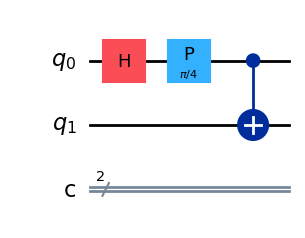

In [288]:
# Shortcut for QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
qc1 = QuantumCircuit(2,2)

# TODO prepare a Bell state
# e.g. by doing a h gate on qubit 0 followed by a cnot on qubits 0 and 1

qc1.h(0)
qc1.p(np.pi/4, 0)
qc1.cx(0,1)

qc1.draw('mpl')

### Statevector

Statevector([0.70710678+0.j , 0.        +0.j , 0.        +0.j ,
             0.5       +0.5j],
            dims=(2, 2))


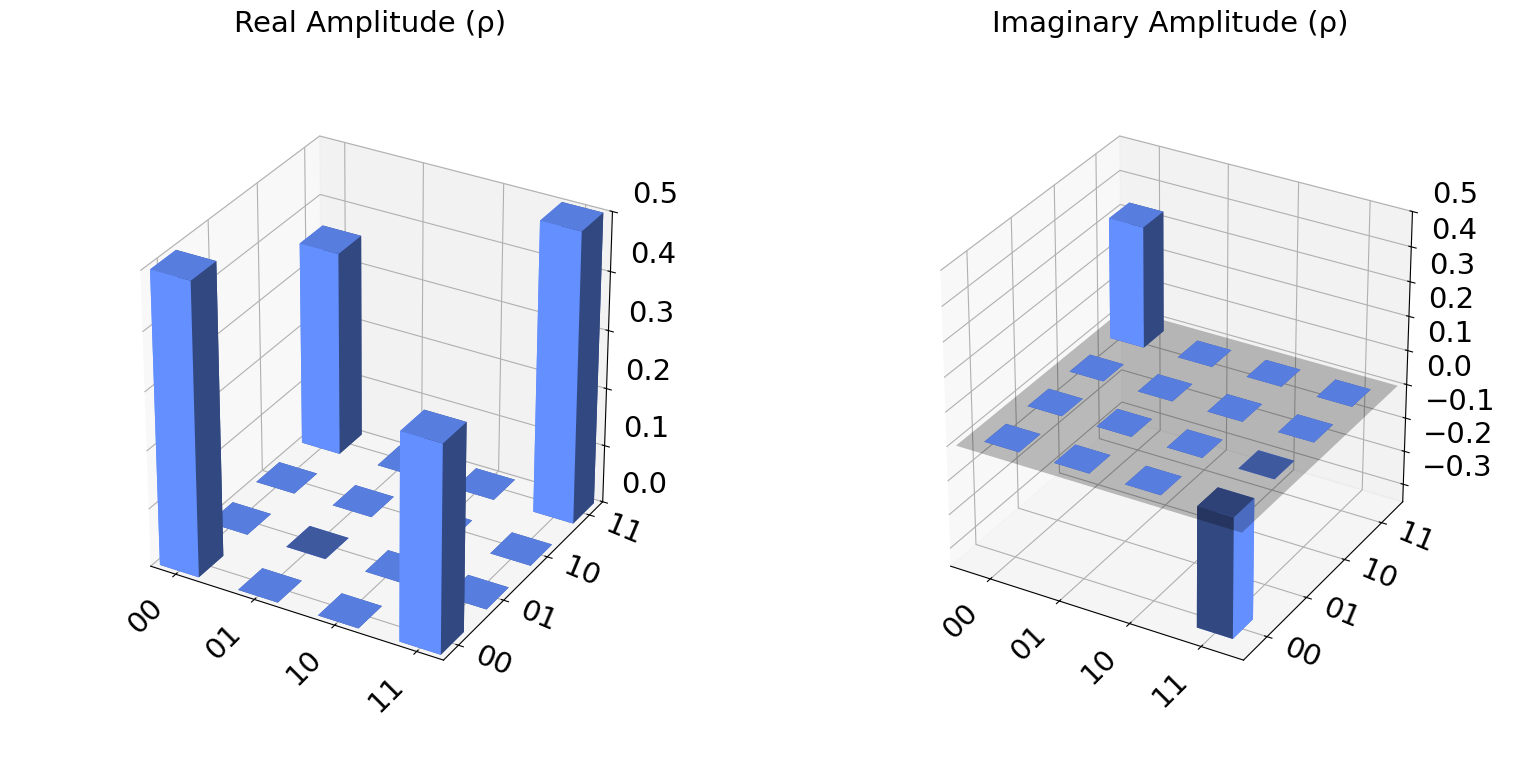

In [289]:

statevector_simulator = StatevectorSimulator()

#Transpile the circuit for the simulator
compiled_circuit = transpile(qc1, statevector_simulator)

# Execute the circuit on the simulator
job = statevector_simulator.run(compiled_circuit)
results1b = job.result()

# Get the statevector
statevector = results1b.get_statevector(qc1)
print(statevector)
plot_state_city(statevector)

### Quantum Measurement 


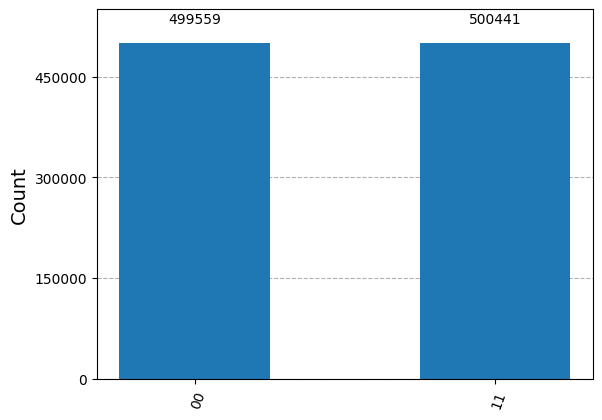

In [290]:
qc1.measure([0,1], [0,1])
# Shortcut:
#qc1.measure_all()

qc1.draw('mpl')

simulator = AerSimulator()
compiled_circuit = transpile(qc1, simulator)

# Execute the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000000)
results1b = job.result()
plot_histogram(results1b.get_counts())

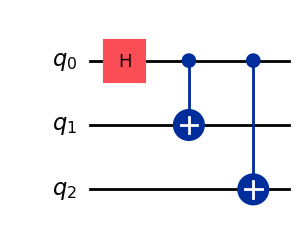

In [291]:
qc2 = QuantumCircuit(3)


# TODO implement a circuit that prepares 1/√2 (|0000⟩ + |1111⟩)

qc2.h(0)
qc2.cx(0,1)
qc2.cx(0,2)
#qc2.cx(0,3)


qc2.draw('mpl')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


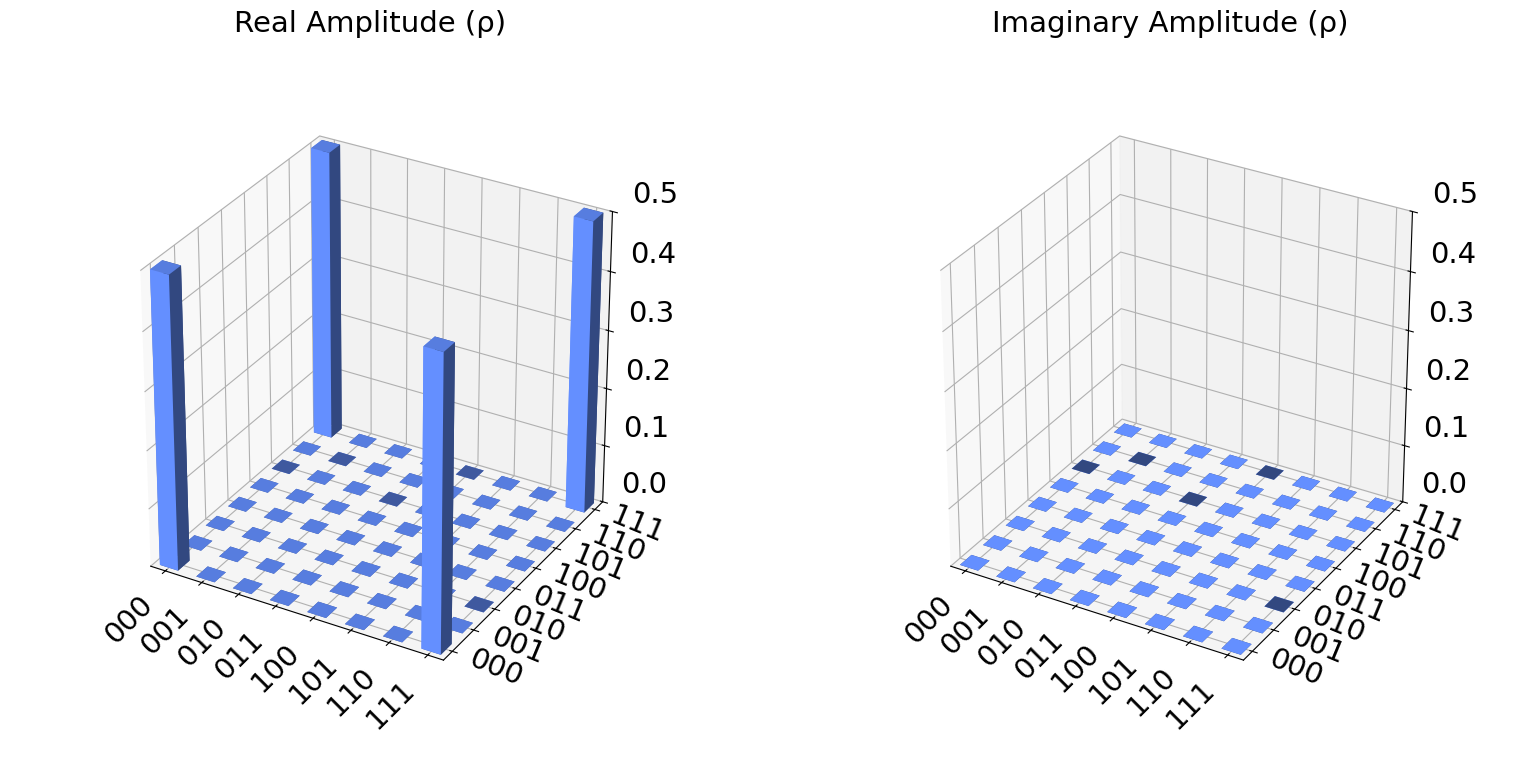

In [292]:

statevector_simulator = StatevectorSimulator()

#Transpile the circuit for the simulator
compiled_circuit = transpile(qc2, statevector_simulator)

# Execute the circuit on the simulator
job = statevector_simulator.run(compiled_circuit)
results2 = job.result()

# Get the statevector
statevector = results2.get_statevector(qc2)
print(statevector)
plot_state_city(statevector)

### Quantum Entanglement Channels

In [298]:

def cn(psi_1_in, psi_2_in,t):
    Omega_0 = 1000
    Omega_1= 2*Omega_0
    
    def psi_1_out(t):
        return np.array([
            psi_1_in[0] * np.exp(1j * Omega_0 * t),
            psi_1_in[1] * np.exp(1j * Omega_1 * t)
        ])

    def psi_2_out(t):
        return np.array([
            psi_2_in[0] * np.conjugate(psi_1_out(t)[0]) + psi_2_in[1] * np.conjugate(psi_1_out(t)[1]),
            psi_2_in[0] * np.conjugate(psi_1_out(t)[1]) + psi_2_in[1] * np.conjugate(psi_1_out(t)[0])
        ])
    return psi_1_out, psi_2_out




# Define the time interval and number of points
t_start = 0
t_end = 0.5
num_points = 10000

# Create an array of time points
psi_1_ini = 1/np.sqrt(2)*np.array([1,1])
psi_2_ini = np.array([1,0])#1/np.sqrt(2)*np.array([1,1])#
t_values = np.linspace(t_start, t_end, num_points)


psi_1_out, psi_2_out = cn(psi_1_ini, psi_2_ini,t_values)

#print("psi_1:", np.round(psi_1_out(500),2))
#print("psi_2:", np.round(psi_2_out(500),2))

alpha = np.array([[psi_1_out(ti)[0] * psi_2_out(ti)[0], 
                   psi_1_out(ti)[0] * psi_2_out(ti)[1], 
                   psi_1_out(ti)[1] * psi_2_out(ti)[0], 
                   psi_1_out(ti)[1] * psi_2_out(ti)[1]] for ti in t_values])

# Evaluate the function at each time point
#f_values = np.array([psi_1_out(ti) for ti in t])

# Compute the temporal average for each component using the trapezoidal rule
#temporal_average = np.trapz(f_values, t, axis=0) / (t_end - t_start)
temporal_average = np.trapz(alpha, t_values, axis=0) / (t_end - t_start)

norm_squared = np.sum(np.abs(temporal_average)**2)

print("Temporal average:", np.round(temporal_average, 2))
print("Norm squared:", norm_squared)


Temporal average: [ 0.5+0.j -0. -0.j -0. +0.j  0.5+0.j]
Norm squared: 0.5000075322569131


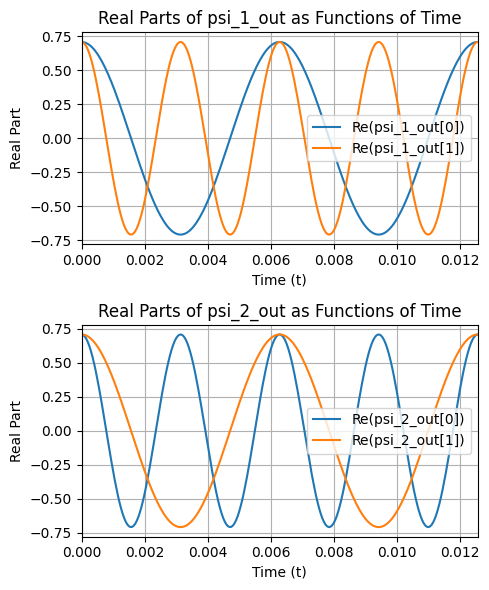

In [284]:

# Create an array of time points
t_values = np.linspace(t_start, t_end, num_points)

# Evaluate the functions at each time point
psi_1_out_values = np.array([psi_1_out(ti) for ti in t_values])
psi_2_out_values = np.array([psi_2_out(ti) for ti in t_values])

# Plot the real parts of psi_1_out and psi_2_out in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

# Plot for psi_1_out
ax1.plot(t_values, psi_1_out_values[:, 0].real, label='Re(psi_1_out[0])')
ax1.plot(t_values, psi_1_out_values[:, 1].real, label='Re(psi_1_out[1])')
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Real Part')
ax1.set_title('Real Parts of psi_1_out as Functions of Time')
ax1.legend()
ax1.grid(True)
ax1.set_xlim([0, 2 * (2 * np.pi / Omega_0)])

# Plot for psi_2_out
ax2.plot(t_values, psi_2_out_values[:, 0].real, label='Re(psi_2_out[0])')
ax2.plot(t_values, psi_2_out_values[:, 1].real, label='Re(psi_2_out[1])')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Real Part')
ax2.set_title('Real Parts of psi_2_out as Functions of Time')
ax2.legend()
ax2.grid(True)
ax2.set_xlim([0, 2 * (2 * np.pi / Omega_0)])

plt.tight_layout()
plt.show()